In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
df_norm=norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


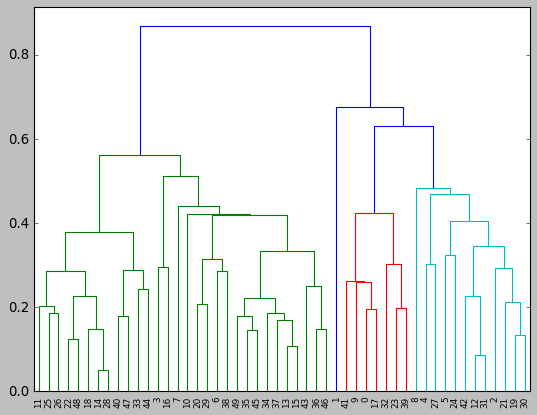

In [11]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))


In [12]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [13]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [14]:
data['h_clusterid']=hc.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


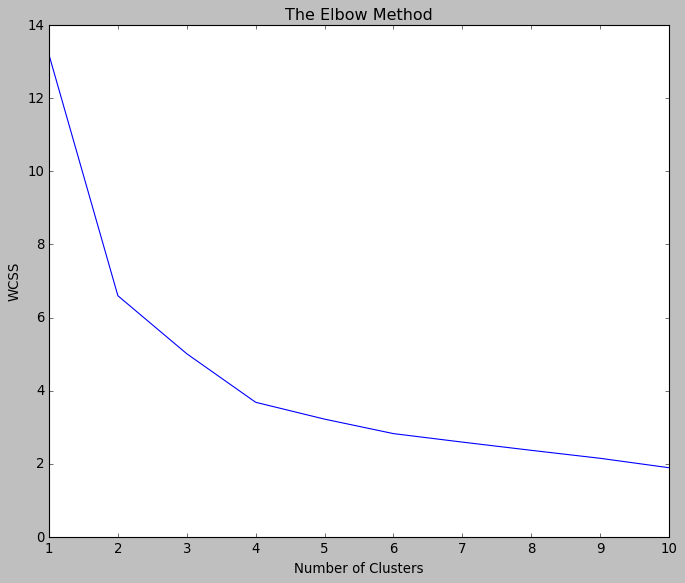

In [15]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [16]:
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [17]:
Crime=pd.Series(model.labels_)
data['Clust']=Crime

In [18]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,3


In [19]:
data.iloc[:,1:10].groupby(data.Clust).mean()

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust
Clust,,,,,,
0,5.656250,138.875000,73.875000,18.781250,1.000000,0.0
1,3.600000,78.538462,52.076923,12.176923,1.769231,1.0
2,10.815385,257.384615,76.000000,33.192308,0.000000,2.0
3,13.937500,243.625000,53.750000,21.412500,0.125000,3.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     object 
 1   Murder       50 non-null     float64
 2   Assault      50 non-null     int64  
 3   UrbanPop     50 non-null     int64  
 4   Rape         50 non-null     float64
 5   h_clusterid  50 non-null     int64  
 6   Clust        50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB


In [21]:
df=data.iloc[:,1:10]
df.values


array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   3. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ,   3. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   0. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   3. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   1. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   1. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   3. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   1. ],
       [ 11.3, 300. ,  67. ,  2

In [22]:
stscaler=StandardScaler().fit(df.values)
data=stscaler.transform(df.values)
data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.06904497,
         1.62086791],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.06904497,
         0.68933463],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.06904497,
         0.68933463],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.26726124,
         1.62086791],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.06904497,
         0.68933463],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.06904497,
         0.68933463],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.26726124,
        -1.17373193],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.26726124,
        -1.17373193],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.06904497,
         0.68933463],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.06904497,
         1.62086791],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [23]:
dbscan=DBSCAN(eps=2,min_samples=10)
dbscan.fit(data)

DBSCAN(eps=2, min_samples=10)

In [24]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1])

In [25]:
data=pd.DataFrame(dbscan.labels_,columns=['cluster'])
data

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [36]:
pd.concat([df,data],axis=1)

,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,Murder,Assault,UrbanPop,Rape,h_clusterid,Clust,cluster
0,13.2,236,58,21.2,0,3,13.2,236,58,21.2,0,3,13.2,236,58,21.2,0,3,0
1,10.0,263,48,44.5,0,2,10.0,263,48,44.5,0,2,10.0,263,48,44.5,0,2,-1
2,8.1,294,80,31.0,0,2,8.1,294,80,31.0,0,2,8.1,294,80,31.0,0,2,0
3,8.8,190,50,19.5,1,3,8.8,190,50,19.5,1,3,8.8,190,50,19.5,1,3,0
4,9.0,276,91,40.6,0,2,9.0,276,91,40.6,0,2,9.0,276,91,40.6,0,2,0
5,7.9,204,78,38.7,0,2,7.9,204,78,38.7,0,2,7.9,204,78,38.7,0,2,0
6,3.3,110,77,11.1,1,0,3.3,110,77,11.1,1,0,3.3,110,77,11.1,1,0,1
7,5.9,238,72,15.8,1,0,5.9,238,72,15.8,1,0,5.9,238,72,15.8,1,0,1
8,15.4,335,80,31.9,0,2,15.4,335,80,31.9,0,2,15.4,335,80,31.9,0,2,0
9,17.4,211,60,25.8,0,3,17.4,211,60,25.8,0,3,17.4,211,60,25.8,0,3,0
